# Exploratory Data Analysis of RADS pkl

#### Charlotte Burbridge! :)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Reading the pickles

In [2]:
rads = pd.read_pickle('data-prep/pkl/rads.pkl')

avy = pd.read_pickle('data-prep/pkl/avy_obs.pkl')
avy["ignore"] = np.nan
avy["ignore"].fillna(5, inplace=True)
# https://stackoverflow.com/questions/16327055/how-to-add-an-empty-column-to-a-dataframe

In [3]:
rads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    794 non-null    object 
 1   Time    794 non-null    object 
 2   Score   701 non-null    float64
 3   Level   794 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 24.9+ KB


In [4]:
avy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 1 to 508
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   avpathid           491 non-null    object        
 1   avobsdate          491 non-null    datetime64[ns]
 2   avobstime          491 non-null    object        
 3   avobserverid       491 non-null    object        
 4   avtype             485 non-null    object        
 5   avtriggertyp       455 non-null    float64       
 6   avtrigger          446 non-null    object        
 7   avrelativesize     474 non-null    object        
 8   avdestructivesize  441 non-null    object        
 9   avinterface        431 non-null    object        
 10  sz_vert            470 non-null    object        
 11  sz_horiz           453 non-null    object        
 12  sz_avgslope        491 non-null    int64         
 13  sz_elev_m          491 non-null    int64         
 14  sz_aspect 

#### A simple visualization to just see the Score ranges

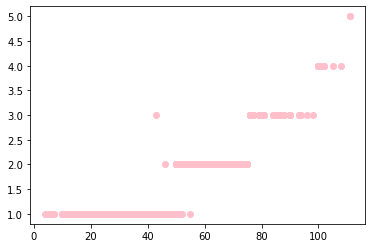

In [5]:
x = rads['Score']
y = rads['Level']

plt.scatter(x, y, c ="pink")

plt.show()

#### Making my Date Column datetime and then making a Month and Year Column so I have those numbers in the dataframe

In [6]:
rads['Date']= pd.to_datetime(rads['Date'])

rads['Month'] = rads['Date'].dt.strftime('%m')
rads['Year'] = rads['Date'].dt.strftime('%y')
rads['Year'] = rads['Year'].astype('int')

#### An attempt to make the RADS Levels Over Time look nice as a visualization but it kind of looks bad in any plot type

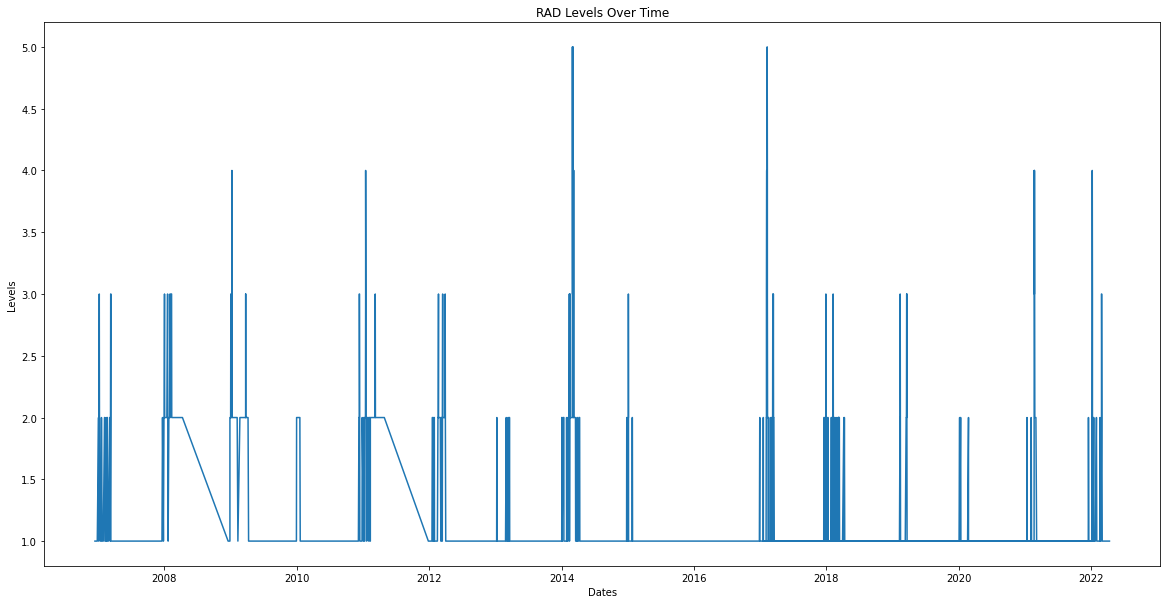

In [7]:
xx = rads['Date']
yy = rads['Level']

fig = plt.figure(figsize = (20, 10))
 
plt.plot(xx, yy)

plt.xlabel("Dates")
plt.ylabel("Levels")
plt.title("RAD Levels Over Time")
plt.show()

#### Now I wanted to incorporate the avalanche data

#### Here is me trying to get the avalanche data in a line, this is not my best work but I tried really hard on this even though it just looks like a weird blob line

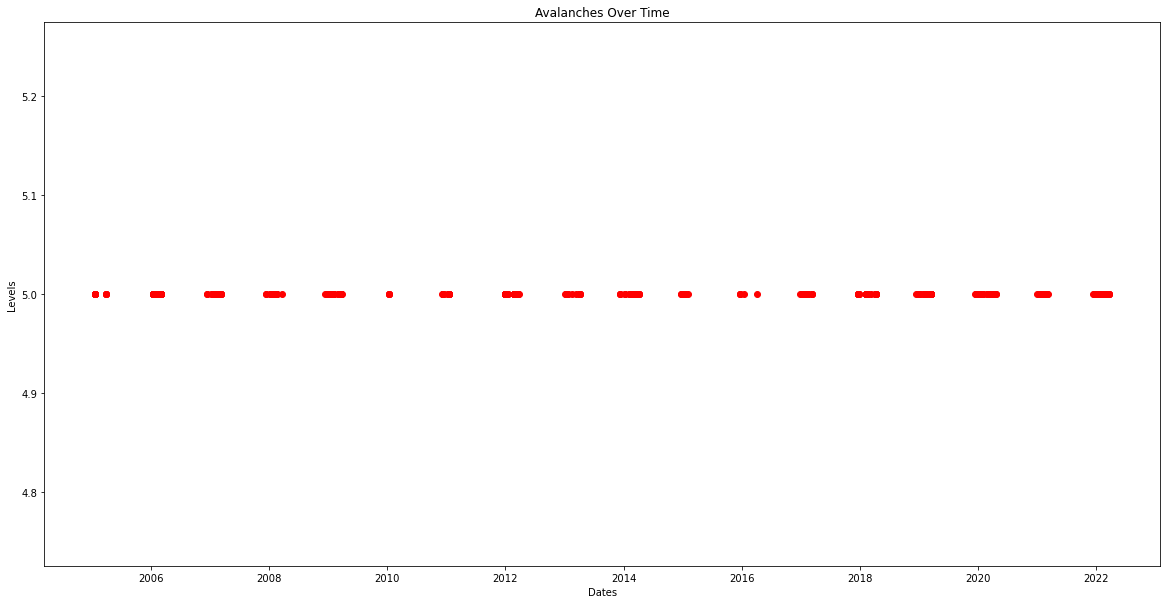

In [8]:
ex = avy['avobsdate']
why = avy['ignore']

fig = plt.figure(figsize = (20, 10))

plt.scatter(ex, why, color = 'red')

plt.xlabel("Dates")
plt.ylabel("Levels")
plt.title("Avalanches Over Time")
plt.show()

#### Now I finally get the idea to combine the RADS Level dataframe and the Avalanche dataframe

In [9]:
avy['Date']= avy['avobsdate']

In [10]:
radsavy = pd.merge(rads, avy, on=["Date"])
#https://realpython.com/pandas-merge-join-and-concat/

#### Here I am trying to put the Avalanche line and the weird RADS Level lines together

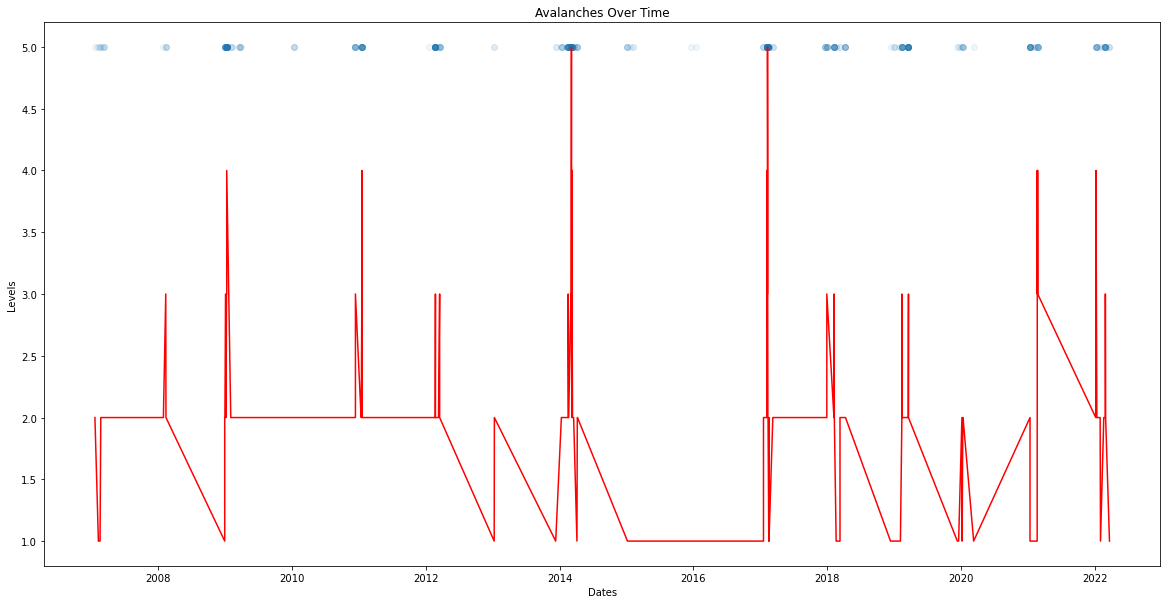

In [11]:
x = radsavy['Date']
y = radsavy['Level']
ys = radsavy['ignore']

fig = plt.figure(figsize = (20, 10))

plt.plot(x, y, color = 'red')
plt.scatter(x, ys, alpha=0.07)

plt.xlabel("Dates")
plt.ylabel("Levels")
plt.title("Avalanches Over Time")
plt.show()

##### I declare that a flop ^

#### Here is where I finally decide that a pie chart is better. It took me a long time to come to this conclusion

In [12]:
levelstot = rads['Level'].value_counts()
levelstot

levelssum = 384+328+68+10+4
levelsaver = [384/794, 328/794, 68/794, 10/794, 4/794]
#794
levelsaver

[0.4836272040302267,
 0.41309823677581864,
 0.08564231738035265,
 0.012594458438287154,
 0.005037783375314861]

In [13]:
levelstot

1    384
2    328
3     68
4     10
5      4
Name: Level, dtype: int64

In [14]:
levelsavy = radsavy['Level'].value_counts()

levelsper = [(1/0.4836272040302267)*56, 1/(0.41309823677581864)*203, 1/(0.08564231738035265)*157, 1/(0.012594458438287154)*46, 1/(0.005037783375314861)*23]
levelsper

[115.79166666666667,
 491.4085365853659,
 1833.205882352941,
 3652.3999999999996,
 4565.5]

In [15]:
avy['Date'].value_counts()

2017-02-07    15
2017-02-06    13
2014-03-05    10
2022-03-01     9
2014-03-06     9
              ..
2013-02-19     1
2013-03-14     1
2013-01-08     1
2013-01-09     1
2022-03-27     1
Name: Date, Length: 209, dtype: int64

([<matplotlib.patches.Wedge at 0x7fabfbce0610>,
 [Text(1.099359383033118, 0.037535941936254584, 'Level 1'),
  Text(1.075116662458594, 0.23264600169333244, 'Level 2'),
  Text(0.6852363423172362, 0.8604947153630262, 'Level 3'),
  Text(-0.8911685531675553, 0.6448399877839822, 'Level 4'),
  Text(0.24551414215175343, -1.0722512793200523, 'Level 5')])

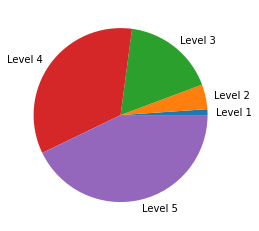

In [16]:
plt.pie(levelsper, labels = ['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5'])
# https://stackoverflow.com/questions/23577505/how-to-avoid-overlapping-of-labels-autopct-in-a-matplotlib-pie-chart

#### Here is my Pie Chart of what RADS Level it is on the days that Avalanches are reported

In [17]:
radsavy

,Date,Time,Score,Level,Month,Year,avpathid,avobsdate,avobstime,avobserverid,...,deb_hwy_w,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip,ignore
0,2007-01-19,00:00:00,NaN,2,01,7,SHED11,2007-01-19,13:20:00,stein_01,...,0.0,0.0,NaN,NaN,2016-03-17 11:50:56,NaN,NaN,0000-00-00 00:00:00,NaN,5.0
1,2007-02-07,00:00:00,NaN,1,02,7,SHED11,2007-02-07,09:30:00,stein_01,...,0.0,0.0,"Debris terminated in bottom of run out, but st...",NaN,2016-03-17 11:50:56,NaN,Adam,2020-05-28 14:26:45,139.51.15.17,5.0
2,2007-02-07,00:00:00,NaN,1,02,7,JAVA,2007-02-07,09:45:00,clark_01,...,0.0,0.0,Located on the top of Java Mountain.,Adam,2020-05-28 14:31:17,139.51.15.17,NaN,0000-00-00 00:00:00,NaN,5.0
3,2007-02-16,00:00:00,NaN,1,02,7,PATH1163,2007-02-16,10:10:00,stein_01,...,0.0,0.0,Debris ran 1/2 path terminating above the rail.,NaN,2016-03-17 11:50:56,NaN,Adam,2020-05-28 14:27:39,139.51.15.17,5.0
4,2007-02-16,00:00:00,NaN,1,02,7,JAKES,2007-02-16,10:10:00,stein_01,...,0.0,0.0,Debris ran 1/2 path terminating above the rail.,NaN,2016-03-17 11:50:56,NaN,Adam,2020-05-28 14:28:15,139.51.15.17,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,2022-03-01,00:00:00,80.0,3,03,22,SHED07W,2022-03-01,05:04:00,clark_01,...,0.0,0.0,Slab not observed until March 17th during a sk...,Adam,2022-03-17 21:17:04,10.30.72.4,NaN,0000-00-00 00:00:00,NaN,5.0
481,2022-03-02,00:00:00,70.0,2,03,22,INFINITY,2022-03-02,11:35:00,clark_01,...,0.0,0.0,One of the last avalanches observed during the...,Adam,2022-03-15 13:38:53,10.30.72.4,NaN,0000-00-00 00:00:00,NaN,5.0
482,2022-03-23,00:00:00,41.0,1,03,22,AP1163H,2022-03-23,13:30:00,clark_01,...,0.0,0.0,NaN,Adam,2022-03-23 21:32:42,10.30.72.4,NaN,0000-00-00 00:00:00,NaN,5.0
483,2022-03-23,00:00:00,41.0,1,03,22,SHED10,2022-03-23,13:30:00,clark_01,...,0.0,0.0,Obs on Mar. 24th from Hwy,Adam,2022-03-28 16:30:35,10.30.72.4,NaN,0000-00-00 00:00:00,NaN,5.0


#### All done! Bye bye!